# Conexión a la base de datos Neo4j desde Python
En esta celda se muestra cómo conectarse a Neo4j usando py2neo. Modifica los parámetros de conexión según tu configuración.

In [28]:
from py2neo import Graph
import networkx as nx
import matplotlib.pyplot as plt

# Configuración de base de datos
NEO4J_URI = 'bolt://localhost:7687'
NEO4J_USER = 'neo4j'
NEO4J_PASSWORD = 'neo4jpass'  

graph = Graph(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
# Prueba la conexión
graph.run('RETURN 1').data()

[{'1': 1}]

# Funciones auxiliares

In [ ]:
def print_records(graph, query):
    """
    Ejecuta una consulta Cypher y muestra los registros resultantes por consola.
    Parámetros:
        graph: conexión py2neo.Graph
        query: str, sentencia Cypher a ejecutar
    """
    result = graph.run(query)  
    for record in result:      
        print(record)          

def plot_nodes(graph, query, attr="nombre", rel_attr="type"):
    """
    Visualiza nodos y relaciones devueltos por una consulta Cypher.
    Si la consulta retorna paths (p), grafica el subgrafo con nodos y relaciones.
    Si retorna nodos individuales, grafica solo los nodos.
    Parámetros:
        graph: conexión py2neo.Graph
        query: str, sentencia Cypher
        attr: str, atributo del nodo a mostrar como etiqueta (por defecto 'nombre')
        rel_attr: str, atributo de la relación a mostrar como etiqueta (por defecto 'type')
    """
    result = graph.run(query)
    keys = result.keys()
    G = nx.DiGraph()
    nodos_set = set()
    nodos_info = []  # Lista para imprimir atributos
    relaciones = []
    for record in result:
        for key in keys:
            val = record[key]
            if hasattr(val, 'nodes') and hasattr(val, 'relationships'):
                for nodo in val.nodes:
                    label = nodo.get(attr, str(nodo))
                    if label not in nodos_set:
                        G.add_node(label)
                        nodos_set.add(label)
                        nodos_info.append((label, dict(nodo)))
                for rel in val.relationships:
                    start = rel.start_node.get(attr, str(rel.start_node))
                    end = rel.end_node.get(attr, str(rel.end_node))
                    rel_label = rel.__class__.__name__ if rel_attr == "type" else rel.get(rel_attr, rel.__class__.__name__)
                    G.add_edge(start, end, label=rel_label)
                    relaciones.append((start, end, rel_label))
            elif hasattr(val, 'labels'):
                label = val.get(attr, str(val))
                if label not in nodos_set:
                    G.add_node(label)
                    nodos_set.add(label)
                    nodos_info.append((label, dict(val)))
    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=10)
    if G.number_of_edges() > 0:
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Visualización de nodos y relaciones')
    plt.show()
    print('Nodos:')
    for label, props in nodos_info:
        print(label, props)
    if relaciones:
        print('Relaciones:')
        for start, end, rel_label in relaciones:
            print(f"{start} -[{rel_label}]-> {end}")

def plot_path(graph, query, attr="nombre", rel_attr="type"):
    """
    Visualiza un camino (path) devuelto por una consulta Cypher.
    Extrae nodos y relaciones del path y los grafica como subgrafo.
    Parámetros:
        graph: conexión py2neo.Graph
        query: str, sentencia Cypher que retorna un path (ej: shortestPath)
        attr: str, atributo del nodo a mostrar como etiqueta
        rel_attr: str, atributo de la relación a mostrar como etiqueta
    """
    result = graph.run(query)
    G = nx.DiGraph()
    nodos_info = []
    relaciones = []
    for record in result:
        for key in record.keys():
            val = record[key]
            if hasattr(val, 'nodes') and hasattr(val, 'relationships'):
                for nodo in val.nodes:
                    label = nodo.get(attr, str(nodo))
                    G.add_node(label)
                    nodos_info.append((label, dict(nodo)))
                for rel in val.relationships:
                    start = rel.start_node.get(attr, str(rel.start_node))
                    end = rel.end_node.get(attr, str(rel.end_node))
                    rel_label = rel.__class__.__name__ if rel_attr == "type" else rel.get(rel_attr, rel.__class__.__name__)
                    G.add_edge(start, end, label=rel_label)
                    relaciones.append((start, end, rel_label))
    if G.number_of_nodes() == 0:
        print("No se encontró camino.")
        return
    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title('Camino encontrado')
    plt.show()
    print('Nodos:')
    for label, props in nodos_info:
        print(label, props)
    print('Relaciones:')
    for start, end, rel_label in relaciones:
        print(f"{start} -[{rel_label}]-> {end}")

# Consultas Cypher para Neo4j - Práctica 3
Este notebook contiene las consultas Cypher del archivo `practica3.cypher` para ser ejecutadas en una base de datos Neo4j. Los resultados que devuelven nodos pueden ser visualizados gráficamente usando librerías como `py2neo` o `neo4j` junto a herramientas de visualización.

## 1. Obtener los nodos de todas las personas de la red.

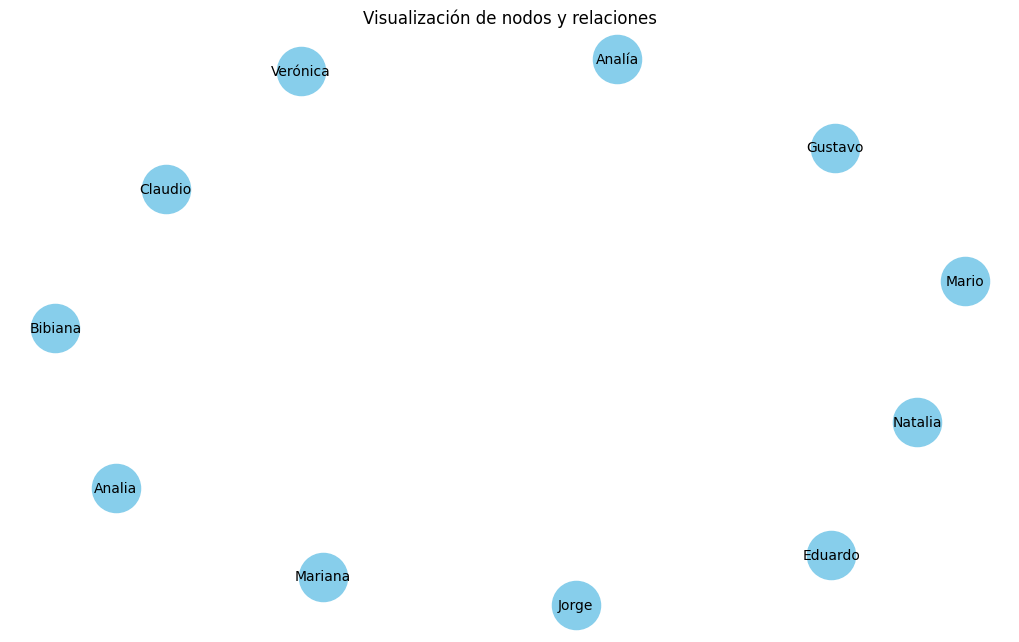

Nodos:
Gustavo {'fechanac': '01/08/1966', 'apellido': 'Corrado', 'nombre': 'Gustavo', 'email': 'gustavo.corrado@gmail.com', 'pais': 'Argentina'}
Analía {'fechanac': '10/12/1978', 'apellido': 'Díaz', 'nombre': 'Analía', 'email': 'adiaz@hotmail.com', 'pais': 'Argentina'}
Mariana {'fechanac': '31/10/1990', 'apellido': 'Dominguez', 'nombre': 'Mariana', 'email': 'mariana@yahoo.com', 'pais': 'Chile'}
Claudio {'fechanac': '18/05/1993', 'apellido': 'Pereyra', 'nombre': 'Claudio', 'email': 'cpereyra30@yahoo.com.ar', 'pais': 'Estados Unidos'}
Mario {'fechanac': '11/02/1970', 'apellido': 'López', 'nombre': 'Mario', 'email': 'mario.lopez@gmail.com', 'pais': 'Argentina'}
Natalia {'fechanac': '07/04/1972', 'apellido': 'Ferreira', 'nombre': 'Natalia', 'email': 'nf@hotmail.com', 'pais': 'Argentina'}
Eduardo {'fechanac': '23/01/1985', 'apellido': 'García', 'nombre': 'Eduardo', 'email': 'garcia@live.com.ar', 'pais': 'Chile'}
Bibiana {'fechanac': '09/11/1974', 'apellido': 'González', 'nombre': 'Bibiana',

In [43]:
query = "MATCH (p:Persona) RETURN p"
plot_nodes(graph, query, attr="nombre")

## 2. Obtener el nombre y fecha de nacimiento de la persona de apellido Domínguez.

In [31]:
query = "MATCH (p:Persona {apellido: 'Dominguez'}) RETURN p.nombre, p.fechanac"
print_records(graph, query)

'Mariana'	'31/10/1990'


## 3. Obtener la lista de empresas en las que trabajó Domínguez.

In [32]:
query = "MATCH (p:Persona {apellido: 'Dominguez'})-[:TRABAJO]->(e:Empresa) RETURN e.nombre"
print_records(graph, query)

'Lan'
'Claro'
'Banco Nación'


## 4. Obtener la lista de personas que estudiaron carreras que no son de nivel 'Universitario' y los nombres de las carreras.

In [33]:
query = "MATCH (p:Persona)-[:ESTUDIO]->(c:Carrera) \
WHERE c.nivel <> 'Universitario' \
RETURN p.nombre, p.apellido, c.nombre;"
print_records(graph, query)

'Mario'	'López'	'Comercialización'
'Jorge'	'Lupis'	'MBA'
'Mario'	'López'	'MBA'
'Eduardo'	'García'	'Tec. En Programación'


## 5. Obtener los nodos etiquetados como Conocimiento.

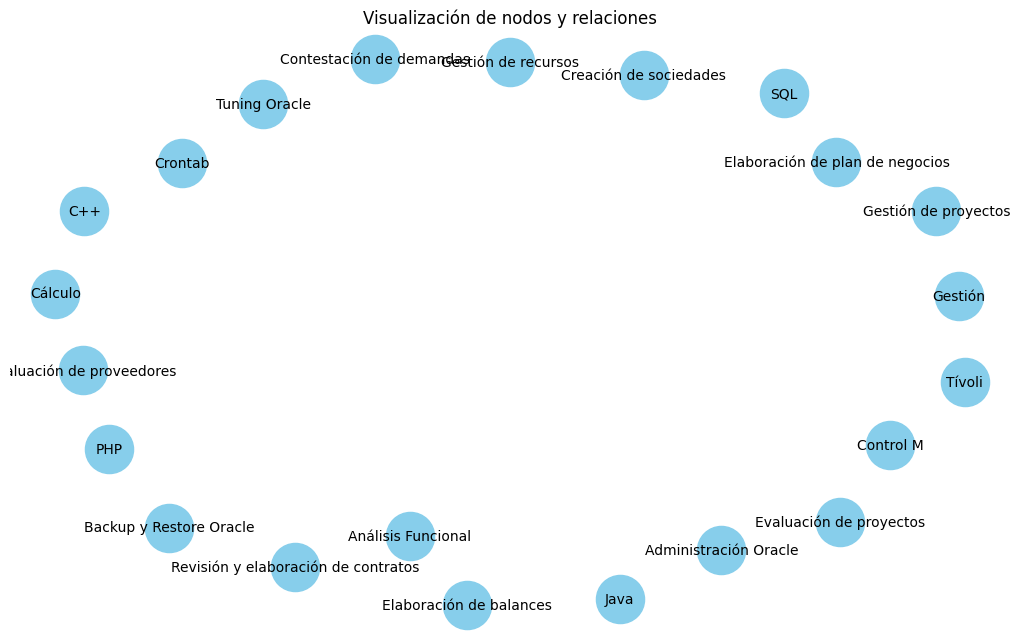

Nodos:
PHP {'nombre': 'PHP'}
Java {'nombre': 'Java'}
Análisis Funcional {'nombre': 'Análisis Funcional'}
Gestión de proyectos {'nombre': 'Gestión de proyectos'}
Revisión y elaboración de contratos {'nombre': 'Revisión y elaboración de contratos'}
Creación de sociedades {'nombre': 'Creación de sociedades'}
Contestación de demandas {'nombre': 'Contestación de demandas'}
Gestión {'nombre': 'Gestión'}
C++ {'nombre': 'C++'}
SQL {'nombre': 'SQL'}
Evaluación de proveedores {'nombre': 'Evaluación de proveedores'}
Control M {'nombre': 'Control M'}
Crontab {'nombre': 'Crontab'}
Tívoli {'nombre': 'Tívoli'}
Elaboración de plan de negocios {'nombre': 'Elaboración de plan de negocios'}
Evaluación de proyectos {'nombre': 'Evaluación de proyectos'}
Elaboración de balances {'nombre': 'Elaboración de balances'}
Gestión de recursos {'nombre': 'Gestión de recursos'}
Administración Oracle {'nombre': 'Administración Oracle'}
Tuning Oracle {'nombre': 'Tuning Oracle'}
Backup y Restore Oracle {'nombre': 'Backu

In [44]:
query = "MATCH (c:Conocimiento) RETURN c"
plot_nodes(graph, query, attr="nombre")

## 6. Obtener los nodos de todas las personas con nombre terminado en a.

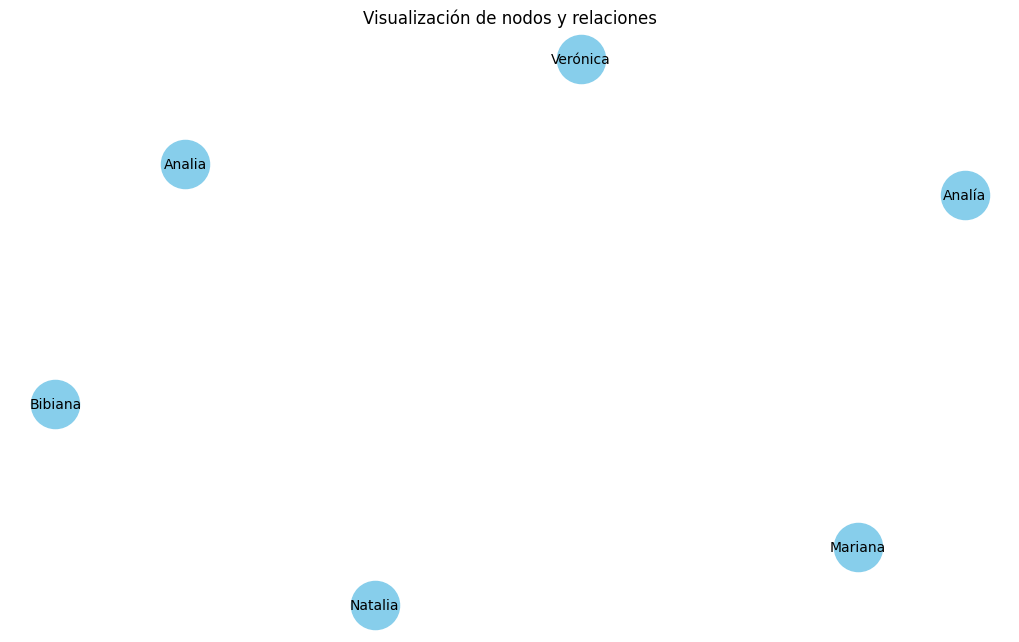

Nodos:
Analía {'fechanac': '10/12/1978', 'apellido': 'Díaz', 'nombre': 'Analía', 'email': 'adiaz@hotmail.com', 'pais': 'Argentina'}
Mariana {'fechanac': '31/10/1990', 'apellido': 'Dominguez', 'nombre': 'Mariana', 'email': 'mariana@yahoo.com', 'pais': 'Chile'}
Natalia {'fechanac': '07/04/1972', 'apellido': 'Ferreira', 'nombre': 'Natalia', 'email': 'nf@hotmail.com', 'pais': 'Argentina'}
Bibiana {'fechanac': '09/11/1974', 'apellido': 'González', 'nombre': 'Bibiana', 'email': 'bibiana@live.com.ar', 'pais': 'España'}
Verónica {'fechanac': '28/02/1968', 'apellido': 'Mendez', 'nombre': 'Verónica', 'email': 'veromendi@yahoo.com.ar', 'pais': 'Argentina'}
Analia {'apellido': 'Martinelli', 'nombre': 'Analia'}


In [45]:
query = "MATCH (p:Persona) WHERE p.nombre ENDS WITH 'a' RETURN p"
plot_nodes(graph, query, attr="nombre")

## 7. Crear un nodo para la persona Analía Martinelli si no existe.

In [36]:
query = "MERGE (p:Persona {nombre: 'Analia', apellido: 'Martinelli'}) RETURN p"
print_records(graph, query)

Node('Persona', apellido='Martinelli', nombre='Analia')


## 8. Asociar un conocimiento 'Cálculo' a Analía Martinelli si no lo posee.

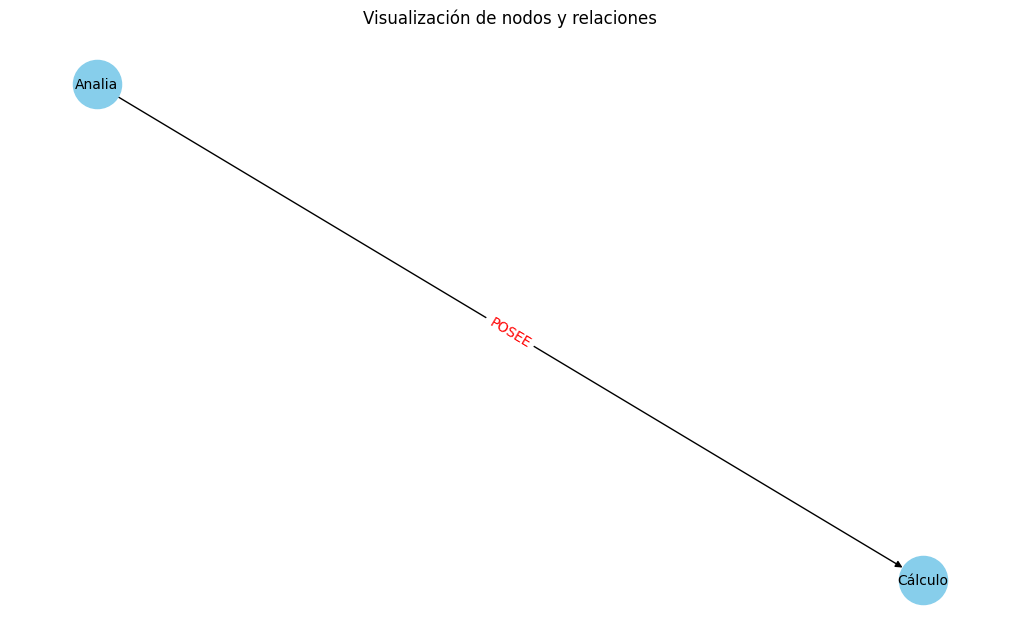

Nodos:
Analia {'apellido': 'Martinelli', 'nombre': 'Analia'}
Cálculo {'nombre': 'Cálculo'}
Relaciones:
Analia -[POSEE]-> Cálculo


In [46]:
query = "MATCH (p:Persona {nombre: 'Analia', apellido: 'Martinelli'}) \
MERGE (c:Conocimiento {nombre: 'Cálculo'}) \
MERGE (p)-[a:POSEE]->(c) \
RETURN p, a, c;" 
plot_nodes(graph, query)

## 9. Verificar si se creó duplicado del conocimiento 'Cálculo'.

In [47]:
query = "MATCH (c:Conocimiento) \
WHERE c.nombre = 'Cálculo' \
RETURN c, count(*) AS cantidad;"
print_records(graph, query)

Node('Conocimiento', nombre='Cálculo')	1


## 10. Crear una relación ESTUDIO para Analía Martinelli con la carrera 'Lic en Sist de Inf', estado 'En curso'.

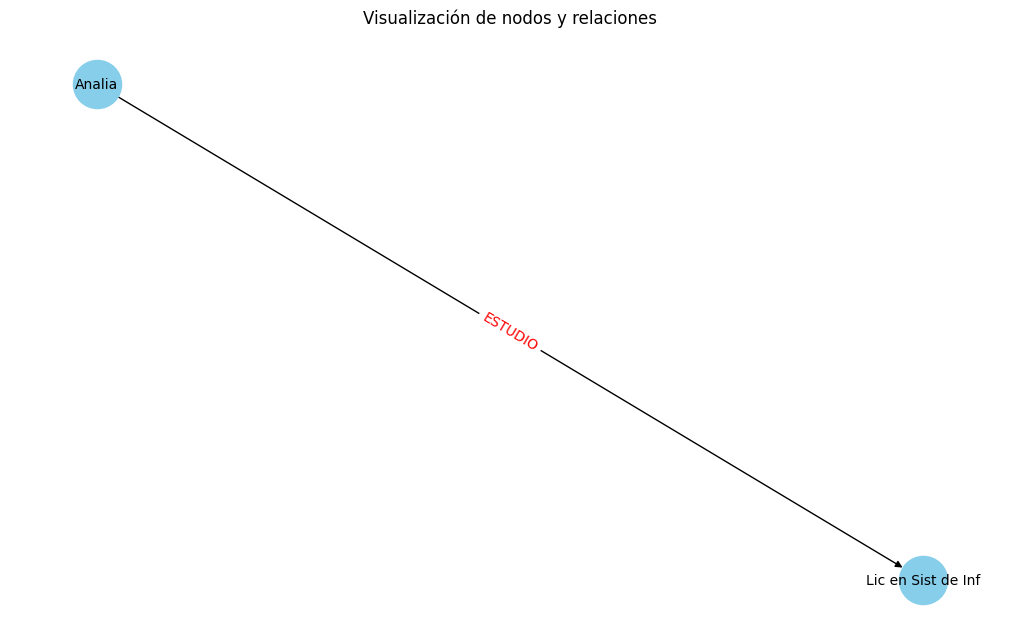

Nodos:
Analia {'apellido': 'Martinelli', 'nombre': 'Analia'}
Lic en Sist de Inf {'nombre': 'Lic en Sist de Inf', 'titulo': 'Licenciado en Sistemas de Información', 'nivel': 'Universitario'}
Relaciones:
Analia -[ESTUDIO]-> Lic en Sist de Inf


In [49]:
query = "MATCH (p:Persona {nombre: 'Analia', apellido: 'Martinelli'}) \
MATCH (c:Carrera {nombre: 'Lic en Sist de Inf'})\
MERGE (p)-[a:ESTUDIO {estado: 'En curso'}]->(c)\
RETURN p, a, c;"
plot_nodes(graph, query)

## 11. Crear un nodo para Verónica Mendez.

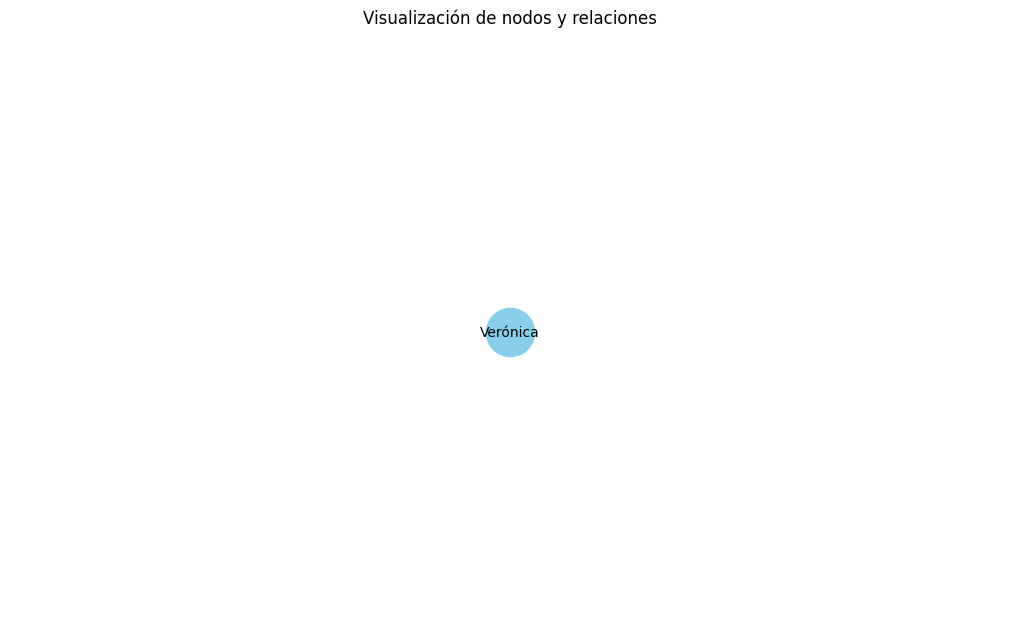

Nodos:
Verónica {'fechanac': '28/02/1968', 'apellido': 'Mendez', 'nombre': 'Verónica', 'email': 'veromendi@yahoo.com.ar', 'pais': 'Argentina'}


In [50]:
query = "MERGE (p:Persona {nombre: 'Verónica', apellido: 'Mendez'}) RETURN p"
plot_nodes(graph, query)

## 12. Crear una relación CONOCE_A entre Analía y Verónica, asegurando que solo se cree una vez.

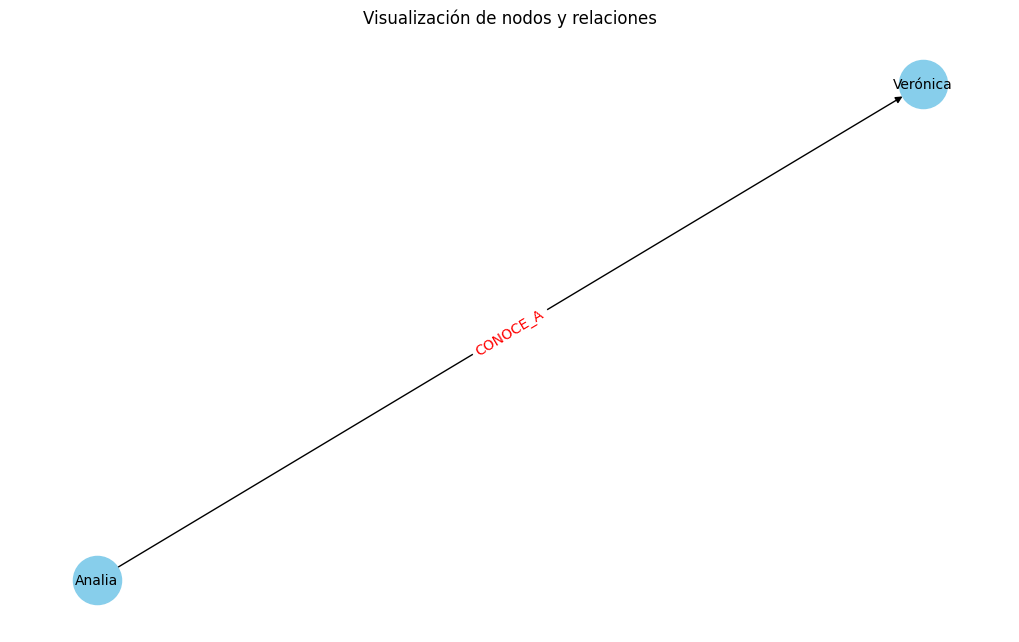

Nodos:
Analia {'apellido': 'Martinelli', 'nombre': 'Analia'}
Verónica {'apellido': 'Mendez', 'nombre': 'Verónica', 'pais': 'Argentina', 'email': 'veromendi@yahoo.com.ar', 'fechanac': '28/02/1968'}
Relaciones:
Analia -[CONOCE_A]-> Verónica


In [52]:
query = "MATCH (a:Persona {nombre: 'Analia', apellido: 'Martinelli'}), (v:Persona {nombre: 'Verónica', apellido: 'Mendez'}) MERGE (a)-[r:CONOCE_A]->(v) RETURN a, r, v"
plot_nodes(graph, query)

## 13. Actualizar o crear el nodo de Analía Martinelli con fecha de nacimiento 30/06/1968.

In [53]:
query = "MERGE (p:Persona {nombre: 'Analia', apellido: 'Martinelli'}) SET p.fechanac = '30/06/1968' RETURN p"
print_records(graph, query)

Node('Persona', apellido='Martinelli', fechanac='30/06/1968', nombre='Analia')


## 14. Agregarle la etiqueta 'Empleado' y el país Argentina a Analía.

In [54]:
query = "MATCH (p:Persona {nombre: 'Analia', apellido: 'Martinelli'}) SET p:Empleado, p.pais = 'Argentina' RETURN p"
print_records(graph, query)

Node('Empleado', 'Persona', apellido='Martinelli', fechanac='30/06/1968', nombre='Analia', pais='Argentina')


## 15. Eliminar la fecha de nacimiento y la etiqueta Persona de Analía.

In [55]:
query = "MATCH (p:Empleado {nombre: 'Analia', apellido: 'Martinelli'}) REMOVE p.fechanac, p:Persona RETURN p"
print_records(graph, query)

Node('Empleado', apellido='Martinelli', nombre='Analia', pais='Argentina')


## 16. Eliminar el nodo de Analía y todas sus relaciones.

In [56]:
query = "MATCH (p {nombre: 'Analia', apellido: 'Martinelli'}) DETACH DELETE p"
graph.run(query)
print('Nodo y relaciones eliminados')

Nodo y relaciones eliminados


## 17. Contar los nodos en total.

In [57]:
query = 'MATCH (n) RETURN count(n) AS total_nodos'
print_records(graph, query)

59


## 18. Contar los tipos de relaciones.

In [58]:
query = 'MATCH ()-[r]->() RETURN type(r) AS tipo_relacion, count(*) AS cantidad'
print_records(graph, query)

'TRABAJO'	22
'POSEE'	33
'ESTUDIO'	11
'DICTADA_EN'	9
'CONOCE_A'	5


## 19. Listar todos los nodos y sus relaciones.

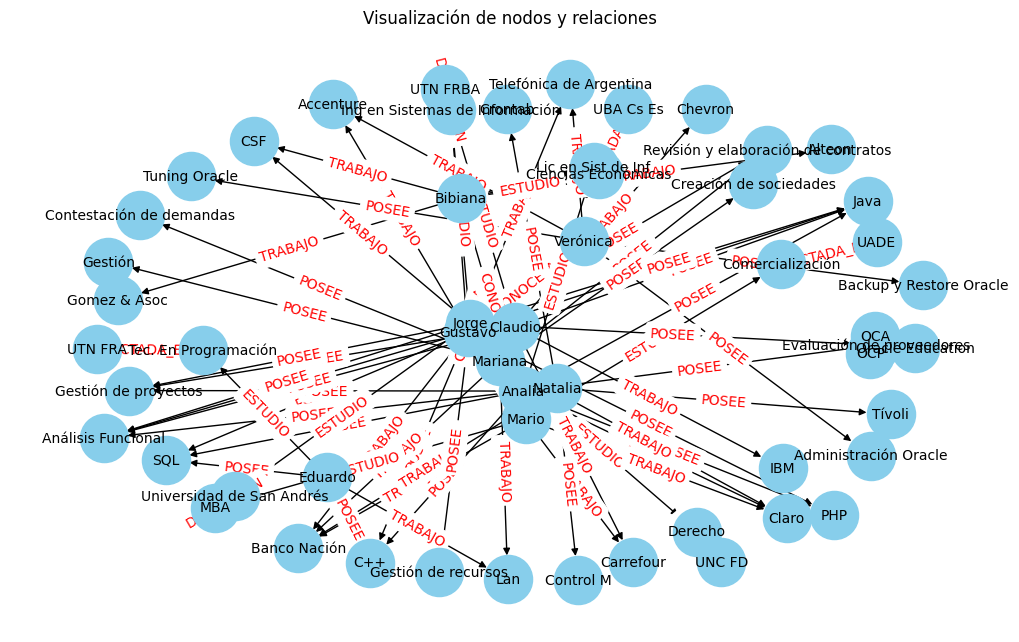

Nodos:
Gustavo {'fechanac': '01/08/1966', 'apellido': 'Corrado', 'nombre': 'Gustavo', 'email': 'gustavo.corrado@gmail.com', 'pais': 'Argentina'}
Telefónica de Argentina {'id': '1', 'nombre': 'Telefónica de Argentina', 'rubro': 'Telefonía', 'tamano': 'Grande', 'ubicacion': 'Argentina'}
Accenture {'id': '2', 'nombre': 'Accenture', 'rubro': 'Consultoría', 'tamano': 'Grande', 'ubicacion': 'Argentina'}
Banco Nación {'id': '9', 'nombre': 'Banco Nación', 'rubro': 'Banco', 'tamano': 'Grande', 'ubicacion': 'Argentina'}
Analía {'fechanac': '10/12/1978', 'apellido': 'Díaz', 'nombre': 'Analía', 'email': 'adiaz@hotmail.com', 'pais': 'Argentina'}
Claro {'id': '11', 'nombre': 'Claro', 'rubro': 'Telefonía', 'tamano': 'Grande', 'ubicacion': 'Argentina'}
Mariana {'fechanac': '31/10/1990', 'apellido': 'Dominguez', 'nombre': 'Mariana', 'email': 'mariana@yahoo.com', 'pais': 'Chile'}
Lan {'id': '5', 'nombre': 'Lan', 'rubro': 'Aviación', 'tamano': 'Mediana', 'ubicacion': 'Chile'}
Claudio {'fechanac': '18/05/

In [60]:
query = 'MATCH (n)-[r]->(m) RETURN n, r, m'
plot_nodes(graph, query)

## 20. Obtener los nombres y rubros de las empresas registradas, reemplazando el rubro 'Telefonía' por IT.

In [61]:
query = "MATCH (e:Empresa) RETURN e.nombre, CASE WHEN e.rubro = 'Telefonía' THEN 'IT' ELSE e.rubro END AS rubro"
print_records(graph, query)

'Telefónica de Argentina'	'IT'
'Accenture'	'Consultoría'
'CSF'	'Gestión de Información Farmacéutica'
'Chevron'	'Petrolera'
'Lan'	'Aviación'
'Gomez & Asoc'	'Reventa'
'Alteon'	'Capacitación'
'IBM'	'IT'
'Banco Nación'	'Banco'
'Carrefour'	'Supermercado'
'Claro'	'IT'


## 21. Determinar qué etiquetas tienen los nodos que son destino de la relación ESTUDIO.

In [62]:
query = 'MATCH (:Persona)-[:ESTUDIO]->(dest) RETURN DISTINCT labels(dest) AS etiquetas'
print_records(graph, query)

['Carrera']


## 22. Verificar las etiquetas de la carrera en la relación ESTUDIO.

In [63]:
query = 'MATCH (:Persona)-[:ESTUDIO]->(carrera) RETURN carrera.nombre, labels(carrera) AS etiquetas'
print_records(graph, query)

'Ing en Sistemas de Información'	['Carrera']
'Lic en Sist de Inf'	['Carrera']
'Derecho'	['Carrera']
'Ing en Sistemas de Información'	['Carrera']
'MBA'	['Carrera']
'Comercialización'	['Carrera']
'Tec. En Programación'	['Carrera']
'Ciencias Económicas'	['Carrera']
'Lic en Sist de Inf'	['Carrera']
'MBA'	['Carrera']
'Ing en Sistemas de Información'	['Carrera']


## 23. Usar UNWIND para transformar una colección en filas individuales.

In [64]:
query = "WITH ['A', 'B', 'C'] AS letras UNWIND letras AS letra RETURN letra"
print_records(graph, query)

'A'
'B'
'C'


## 24. Contar la cantidad de personas que estudiaron una carrera en cualquier estado.

In [65]:
query = 'MATCH (p:Persona)-[:ESTUDIO]->(:Carrera) RETURN count(DISTINCT p) AS cantidad_personas'
print_records(graph, query)

8


## 25. Identificar si puede llegarse directa o indirectamente desde Mario López hasta Jorge Lupis mediante la relación CONOCE_A.

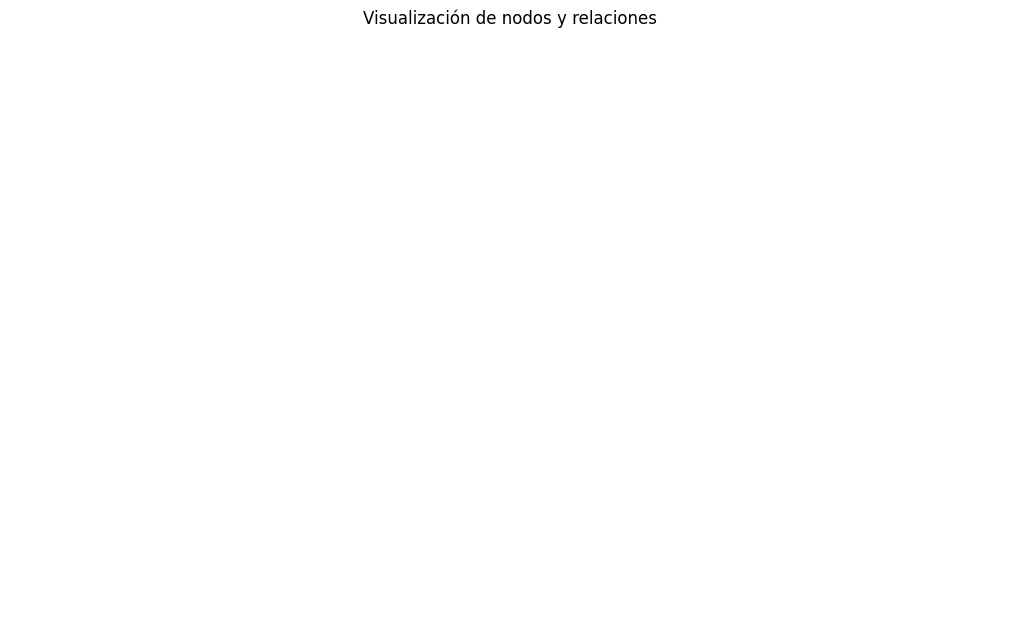

Nodos:


In [ ]:
query = "MATCH (inicio:Persona {nombre: 'Mario', apellido: 'López'}), (fin:Persona {nombre: 'Jorge', apellido: 'Lupis'}), p = shortestPath((inicio)-[:CONOCE_A*]->(fin)) RETURN p"
plot_path(graph, query)

## 26. Obtener el camino más corto entre Gustavo y Mario en la relación CONOCE_A.

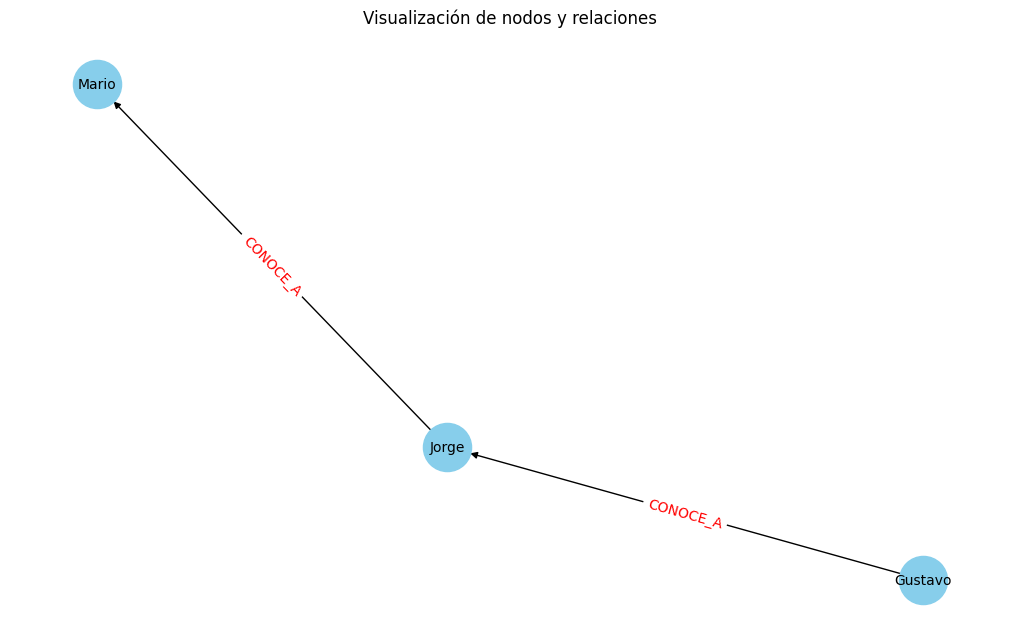

Nodos:
Gustavo {'fechanac': '01/08/1966', 'apellido': 'Corrado', 'nombre': 'Gustavo', 'email': 'gustavo.corrado@gmail.com', 'pais': 'Argentina'}
Jorge {'apellido': 'Lupis', 'nombre': 'Jorge', 'pais': 'Argentina', 'email': 'jlup@gmail.com', 'fechanac': '27/09/1980'}
Mario {'apellido': 'López', 'nombre': 'Mario', 'pais': 'Argentina', 'email': 'mario.lopez@gmail.com', 'fechanac': '11/02/1970'}
Relaciones:
Gustavo -[CONOCE_A]-> Jorge
Jorge -[CONOCE_A]-> Mario


In [69]:
query = "MATCH (a:Persona {nombre: 'Gustavo'}), (b:Persona {nombre: 'Mario'}), p = shortestPath((a)-[:CONOCE_A*]-(b)) RETURN p"
plot_nodes(graph, query)

## 27. Listar los caminos de relaciones de un camino determinado.

In [72]:
query = "MATCH p = (a:Persona {nombre: 'Mario', apellido: 'López'})-[:CONOCE_A*]->(b:Persona {nombre: 'Jorge', apellido: 'Lupis'}) RETURN relationships(p) AS relaciones"
print_records(graph, query)

## 28. Verificar si una persona trabajó o trabajó en empresas que otro determinado profesional trabajo, para sugerir contactos.

In [73]:
query = "MATCH (p1:Persona)-[:TRABAJO]->(e:Empresa)<-[:TRABAJO]-(p2:Persona) WHERE p1 <> p2 RETURN p1.nombre AS persona, collect(DISTINCT p2.nombre) AS posibles_contactos, e.nombre AS empresa"
print_records(graph, query)

'Natalia'	['Gustavo', 'Mariana', 'Mario']	'Banco Nación'
'Mario'	['Gustavo', 'Mariana', 'Natalia']	'Banco Nación'
'Mariana'	['Gustavo', 'Mario', 'Natalia']	'Banco Nación'
'Verónica'	['Gustavo']	'Accenture'
'Verónica'	['Gustavo']	'Telefónica de Argentina'
'Mario'	['Analía', 'Mariana']	'Claro'
'Mariana'	['Analía', 'Mario']	'Claro'
'Eduardo'	['Mariana']	'Lan'
'Analía'	['Mariana', 'Mario']	'Claro'
'Gustavo'	['Mariana', 'Mario', 'Natalia']	'Banco Nación'
'Mario'	['Claudio']	'Carrefour'
'Claudio'	['Mario']	'Carrefour'
'Mariana'	['Eduardo']	'Lan'
'Jorge'	['Bibiana']	'CSF'
'Bibiana'	['Jorge']	'CSF'
'Gustavo'	['Verónica']	'Telefónica de Argentina'
'Gustavo'	['Verónica']	'Accenture'


## 29. Obtener los conocimientos más compartidos en cada carrera.

In [74]:
query = "MATCH (p:Persona)-[:ESTUDIO]->(c:Carrera), (p)-[:POSEE]->(con:Conocimiento) RETURN c.nombre AS carrera, con.nombre AS conocimiento, count(*) AS cantidad ORDER BY carrera, cantidad DESC"
print_records(graph, query)

'Derecho'	'Gestión'	1
'Derecho'	'Contestación de demandas'	1
'Derecho'	'Creación de sociedades'	1
'Derecho'	'Revisión y elaboración de contratos'	1
'Ing en Sistemas de Información'	'Análisis Funcional'	3
'Ing en Sistemas de Información'	'Java'	3
'Ing en Sistemas de Información'	'Gestión de proyectos'	2
'Ing en Sistemas de Información'	'SQL'	1
'Ing en Sistemas de Información'	'C++'	1
'Ing en Sistemas de Información'	'PHP'	1
'Ing en Sistemas de Información'	'Gestión de recursos'	1
'Ing en Sistemas de Información'	'Evaluación de proveedores'	1
'Ing en Sistemas de Información'	'Revisión y elaboración de contratos'	1
'Lic en Sist de Inf'	'Evaluación de proveedores'	1
'Lic en Sist de Inf'	'SQL'	1
'Lic en Sist de Inf'	'C++'	1
'Lic en Sist de Inf'	'Gestión de proyectos'	1
'Lic en Sist de Inf'	'Análisis Funcional'	1
'Lic en Sist de Inf'	'Java'	1
'Lic en Sist de Inf'	'PHP'	1
'MBA'	'Gestión de recursos'	1
'MBA'	'Evaluación de proveedores'	1
'MBA'	'Revisión y elaboración de contratos'	1
'MBA'	'Ges

## 30. Ranking de los primeros 2 conocimientos de la carrera 'Ing en Sistemas de Información'.

In [75]:
query = "MATCH (p:Persona)-[:ESTUDIO]->(c:Carrera {nombre: 'Ing en Sistemas de Información'}), (p)-[:POSEE]->(con:Conocimiento) RETURN con.nombre AS conocimiento, count(*) AS cantidad ORDER BY cantidad DESC LIMIT 2"
print_records(graph, query)

'Análisis Funcional'	3
'Java'	3
